In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

df= pd.read_csv('StudentPerformanceFactors.csv')

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df['Teacher_Quality'].sample(10)
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


mapping = {
    'Low': 0, 'High': 1, 'Medium': 2,
    'Yes': 3, 'No': 4,
    'Public': 5, 'Private': 16,
    'Positive': 6, 'Negative': 7, 'Neutral': 15,
    'High School': 8, 'College': 9, 'Postgraduate': 10,
    'Near': 11, 'Moderate': 12, 'Far': 17,
    'Male': 13, 'Female': 14
}

# List of categorical columns you want to map
categorical_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
    ]

df[categorical_cols] = df[categorical_cols].applymap(lambda x: mapping.get(x, x))

df.sample(10)

C:\Users\abdel\AppData\Local\Temp\ipykernel_7872\1891749694.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[categorical_cols] = df[categorical_cols].applymap(lambda x: mapping.get(x, x))


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4006,4,84,2,2,3,6,70,2,3,5,2,1,16,15,4,4,8,11,13,65
4430,9,66,0,2,4,9,100,0,3,3,2,2,5,15,3,4,9,11,13,62
5587,4,73,0,2,3,5,97,1,3,1,0,1,5,7,1,4,8,11,13,60
5515,11,75,0,1,4,8,64,2,3,3,0,2,5,15,3,3,9,12,14,62
5325,20,68,0,0,4,8,88,2,3,5,0,0,16,15,3,4,8,12,13,63
1660,28,92,0,1,4,5,96,1,3,1,2,0,5,15,3,4,9,12,13,72
4672,23,68,2,1,4,7,53,1,3,3,1,2,5,15,3,4,8,12,14,66
3826,13,80,2,2,4,9,76,2,3,0,1,2,5,15,2,4,8,11,14,64
4745,18,100,1,2,3,10,86,2,3,1,2,2,5,15,3,4,8,11,13,72
1909,21,94,2,2,3,9,65,0,3,5,1,1,16,15,3,3,8,11,13,71


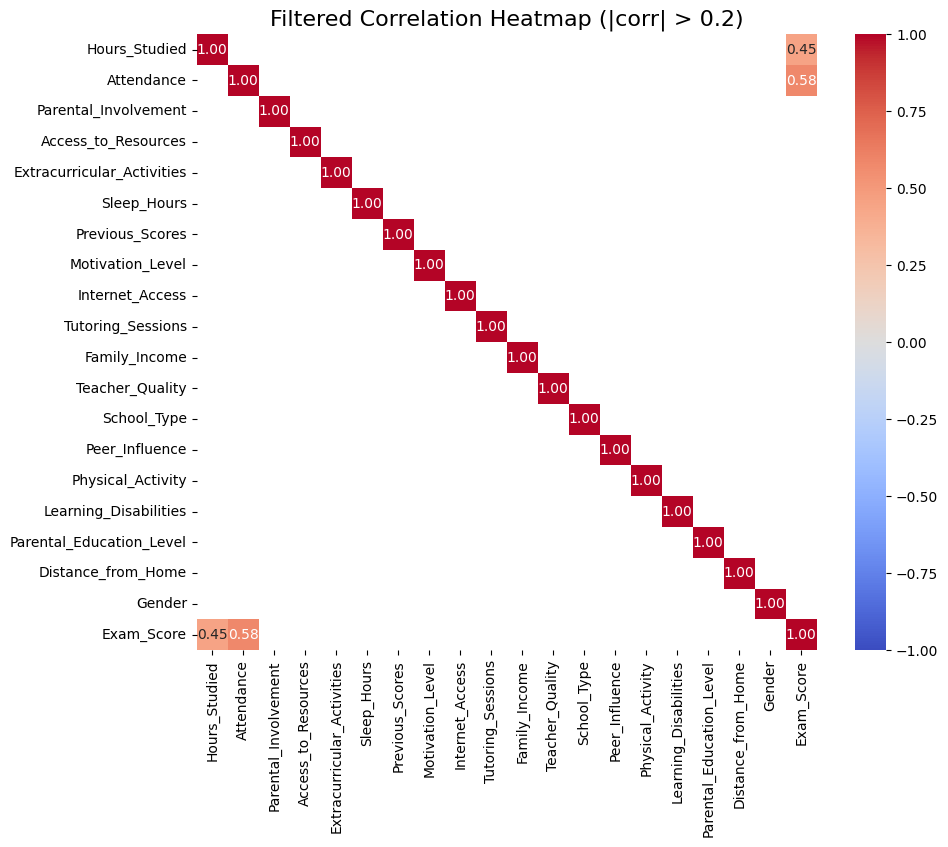

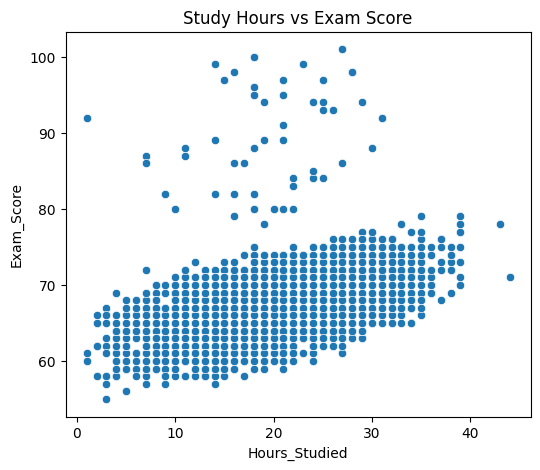

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=abs(df.corr()) < 0.2)
plt.title("Filtered Correlation Heatmap (|corr| > 0.2)", fontsize=16)
plt.show()

# Study Hours vs Exam Score
plt.figure(figsize=(6,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Study Hours vs Exam Score")
plt.show()


## Linear Regression 

In [7]:

# 1. Prepare the dataset
# Drop the target column to get features (X)
X = df.drop(columns=['Exam_Score'])

# Select the target column (y)
Y = df['Exam_Score']

# 2. Split into training and testing sets
# 90% training, 10% testing, fixed random_state for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# 3. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate model performance
r2 = r2_score(Y_test, y_pred)                         # R² score (how well the model explains variance)
mae = mean_absolute_error(Y_test, y_pred)             # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))    # Root Mean Squared Error

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# 6. Predict for the entire dataset
# Add a new column 'Predicted Score' with predictions for all rows
df["Predicted Score"] = model.predict(X)

# 7. Show the first few rows
df.head()

R² Score: 0.7639473463391377
Mean Absolute Error: 1.0439439780147526
Root Mean Squared Error: 1.7817314730576514


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Predicted Score
0,23,84,0,1,4,7,73,0,3,0,...,2,5,6,3,4,8,11,13,67,66.891631
1,19,64,0,2,4,8,59,0,3,2,...,2,5,7,4,4,9,12,14,61,63.353973
2,24,98,2,2,3,7,91,2,3,2,...,2,5,15,4,4,10,11,13,74,74.878577
3,29,89,0,2,3,8,98,2,3,1,...,2,5,7,4,4,8,12,13,71,73.050607
4,19,92,2,2,3,6,65,2,3,3,...,1,5,15,4,4,9,11,14,70,71.094264


### Polynomial Regression

In [8]:

# Polynomial features 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluation
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Predictions for the full dataset
df["Predicted Score"] = model.predict(poly.transform(X))

df.head()

R² Score: 0.8486425327770815
Mean Absolute Error: 0.4918097077497191
Root Mean Squared Error: 1.4267232346390808


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Predicted Score
0,23,84,0,1,4,7,73,0,3,0,...,2,5,6,3,4,8,11,13,67,67.065011
1,19,64,0,2,4,8,59,0,3,2,...,2,5,7,4,4,9,12,14,61,61.219011
2,24,98,2,2,3,7,91,2,3,2,...,2,5,15,4,4,10,11,13,74,74.336230
3,29,89,0,2,3,8,98,2,3,1,...,2,5,7,4,4,8,12,13,71,70.867457
4,19,92,2,2,3,6,65,2,3,3,...,1,5,15,4,4,9,11,14,70,71.110273


### Actual results Vs Predicted Results


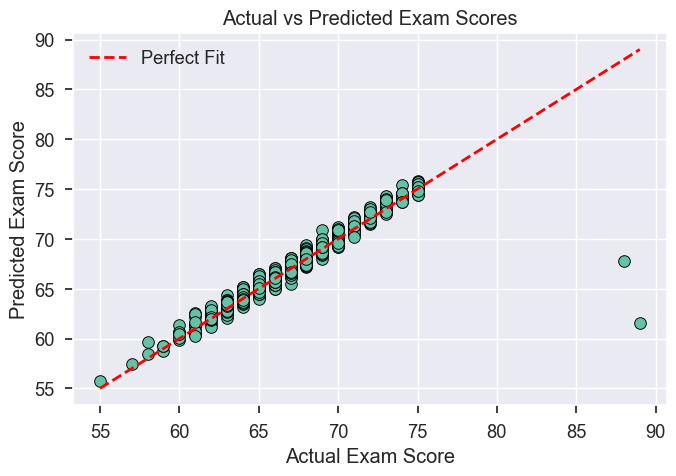

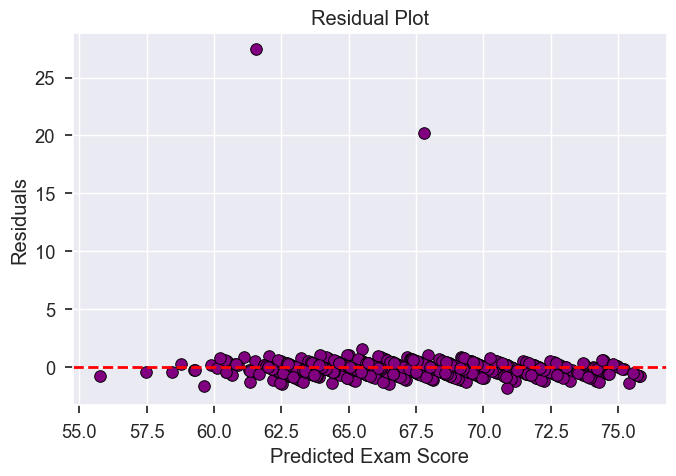

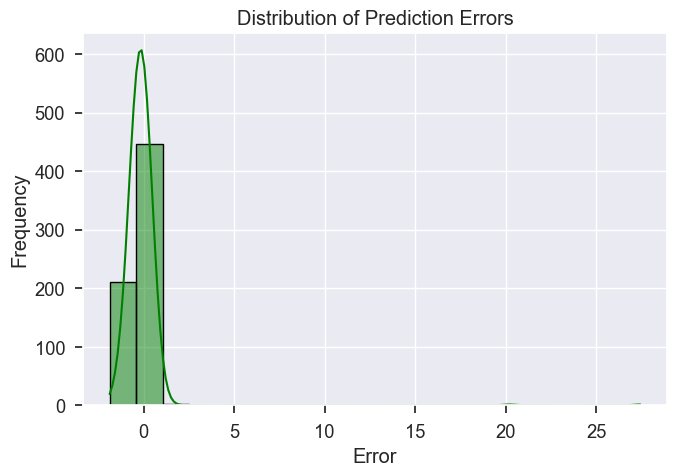

In [9]:

# Set a clean style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.2)

# 1. Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=Y_test, y=y_pred, s=70, edgecolor="k")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = Y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, s=70, edgecolor="k", color="purple")
plt.axhline(y=0, color="red", linestyle="--", lw=2)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


# 3. Error Distribution
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color="green", bins=20, edgecolor="k")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
